### Aşamalara chart print fonksiyonu koymaca.

In [1]:
import os
import pickle
import itertools
import pandas as pd

from matplotlib import colors
import matplotlib.pyplot as plt

from map_engine.map_generator import map

from quest_engine.quest_generator import *
from quest_engine.freytags_fitness import freytags

from encounter_engine.world_encounters import *

from character_engine.character import *

In [2]:
#nw = map()
#
#nw.populate_map(n_locations=1024, name="terrain", relaxed=True, k=100)
#nw.populate_map(n_locations=4096, name="civilisation", relaxed=True, k=250)
#nw.populate_map(n_locations=36, name="story_act", relaxed=True, k=250)
#nw.populate_map(n_locations=1024, name="threat", relaxed=True, k=100)
#
#nw.attribute_view(seed_1=24, seed_2=34,
#                  map_name="terrain", view_name="terrain")
#nw.attribute_view(seed_1=98, seed_2=50, map_name="civilisation",
#                  view_name="civilisation", double=False)
#nw.attribute_view(seed_1=34, seed_2=34, map_name="threat",
#                  view_name="threat", double=False)
#nw.attribute_view(seed_1=16, seed_2=16, map_name="story_act",
#                  view_name="story_act", double=False)
#
#nw.attribute_centroids("civilisation")
#nw.attribute_centroids("terrain")
##nw.land_mask()
#
#with open('logs/map_nw', 'wb') as f:
#    pickle.dump(nw, f)

with open("logs/map_nw", "rb") as f:
    nw = pickle.load(f)

nw.land_mask()

In [16]:
pop = quest_pop(nw,act=2, pop_size=5, steps=3)
ind = pop.evolve(gens=1,early_stop=False, mu_p=.3, xo="pmx", mutation="random_point", fancy_save=True,print_it=False)

Found the required individual on gen 159


/var/folders/b0/myrlwrn92tx10wp6gb5y7c540000gn/T/ipykernel_30891/1693601391.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


KeyboardInterrupt: 

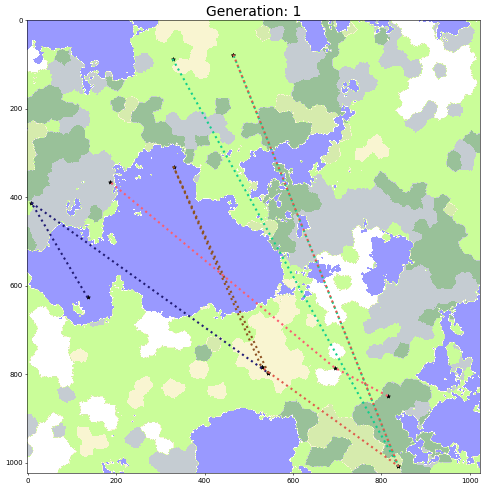

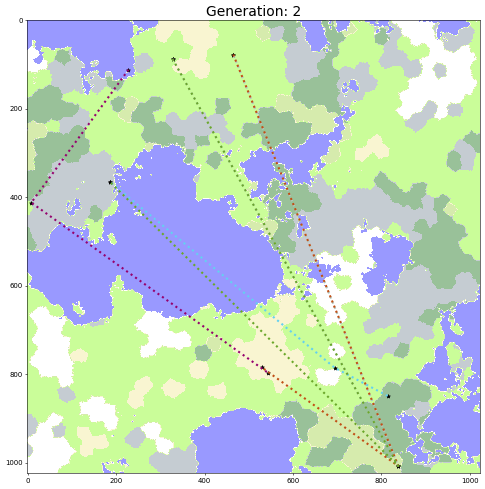

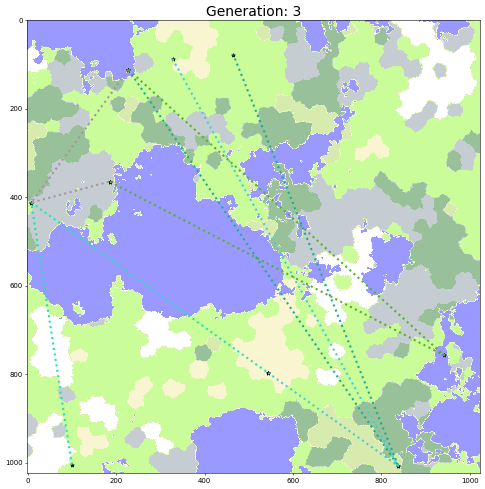

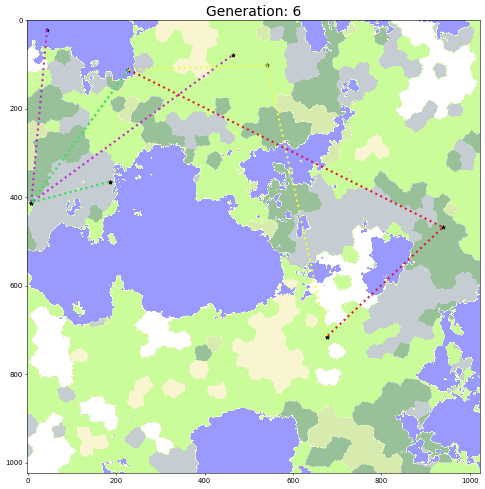

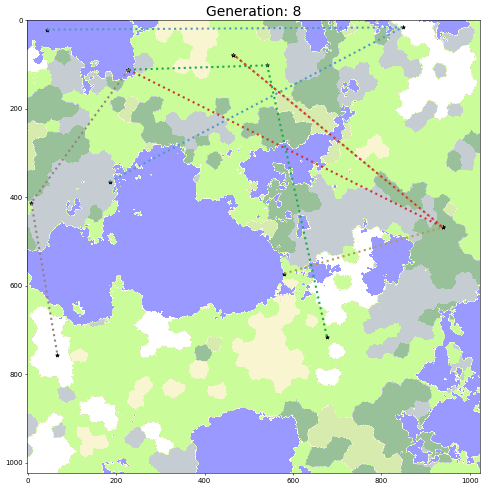

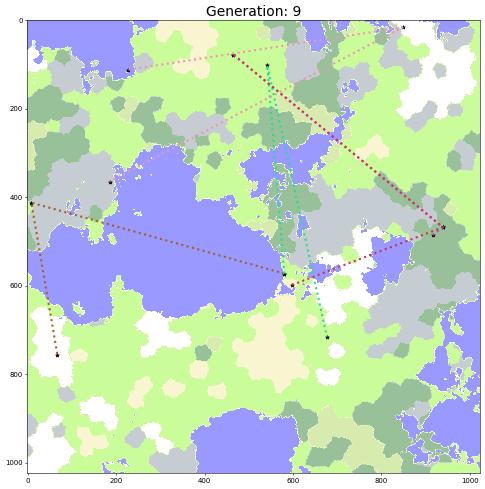

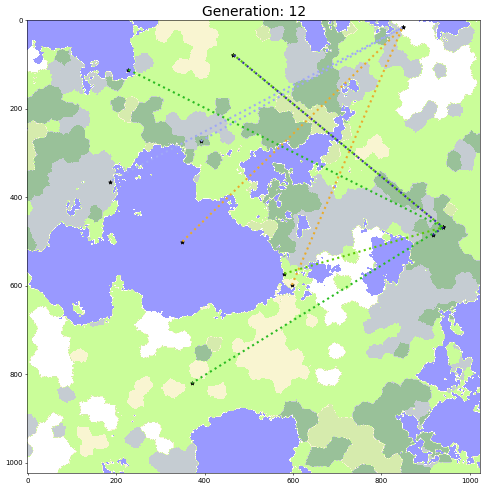

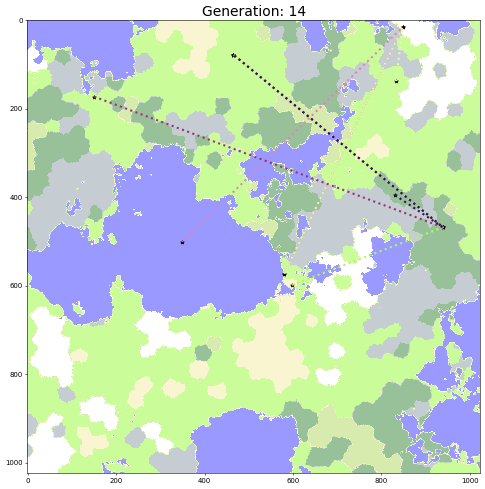

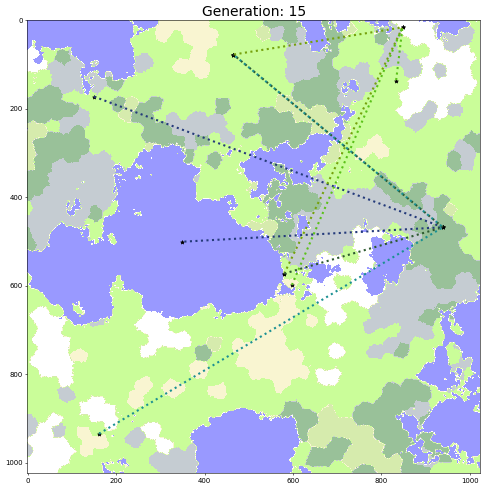

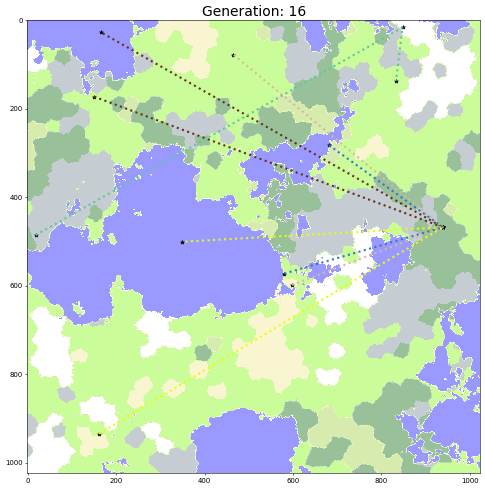

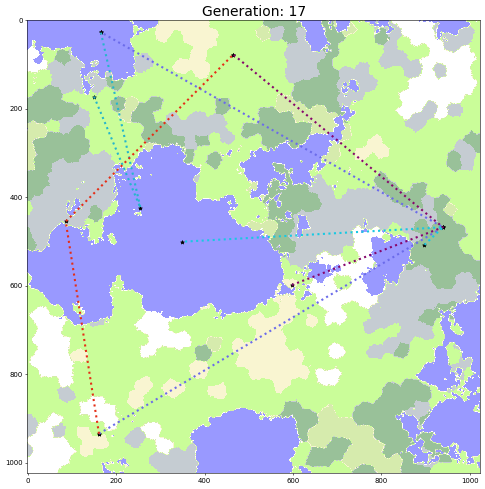

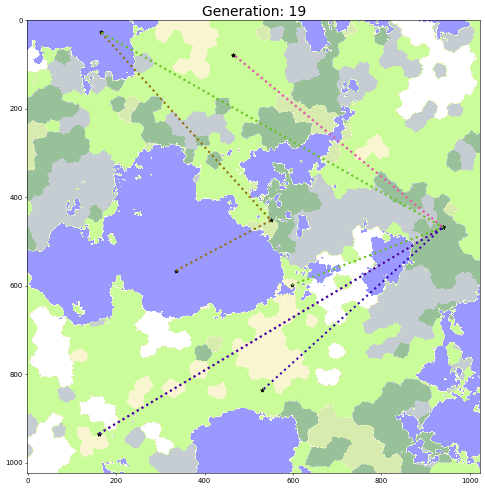

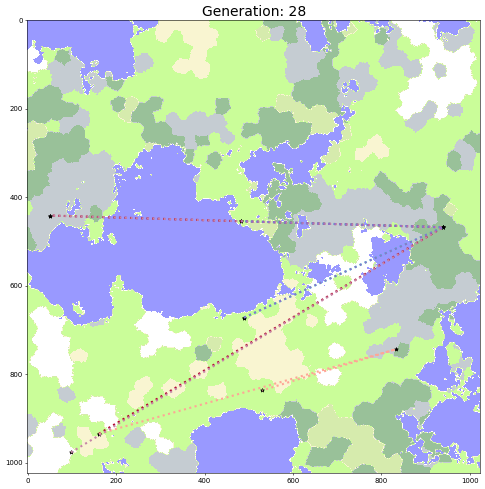

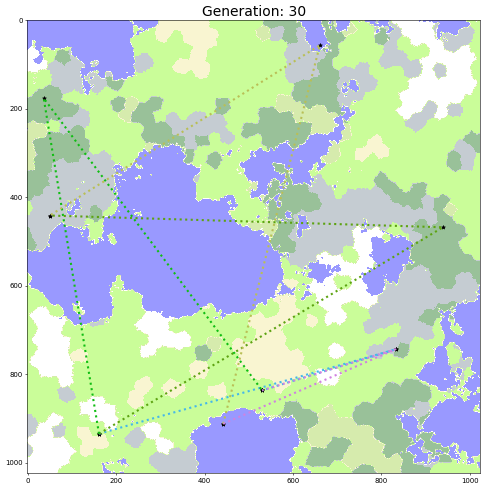

In [17]:
cmap = colors.ListedColormap(
    ["blue", "white", "yellowgreen", "khaki", "lawngreen", "slategrey", "darkgreen"])

i = 1
for gen in pop.fancy:
    fig, ax = plt.subplots()
    fig.set_dpi(50)
    fig.set_size_inches(12, 12)
    ax.imshow(nw.views["terrain"].T, cmap=cmap, alpha=.40)
    for q in gen:
        color = (random.random(), random.random(), random.random())
        ax.scatter([i[0] for i in q], [i[1] for i in q], color="black",marker="*", s=30)
        ax.plot([i[0] for i in q], [i[1] for i in q], color=color,linestyle="dotted",linewidth=3)
        ax.set_title("Generation: {}".format(i), size=20)
    fig.savefig(f"fancy/{i}.png")
    i += 1





/var/folders/b0/myrlwrn92tx10wp6gb5y7c540000gn/T/ipykernel_30891/694403321.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


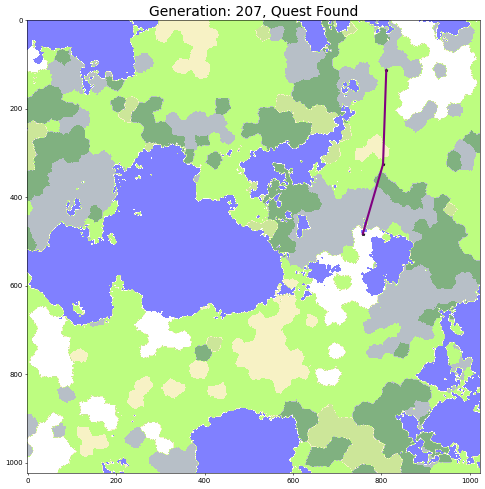

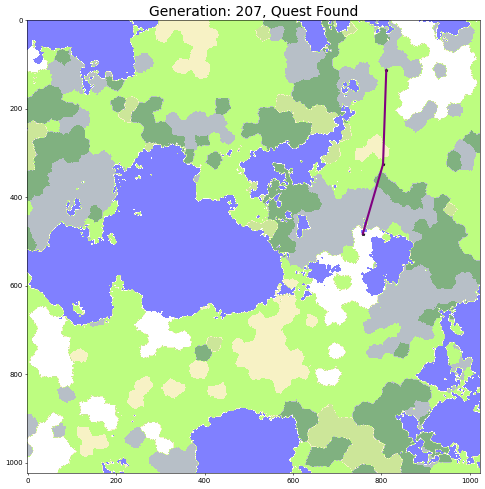

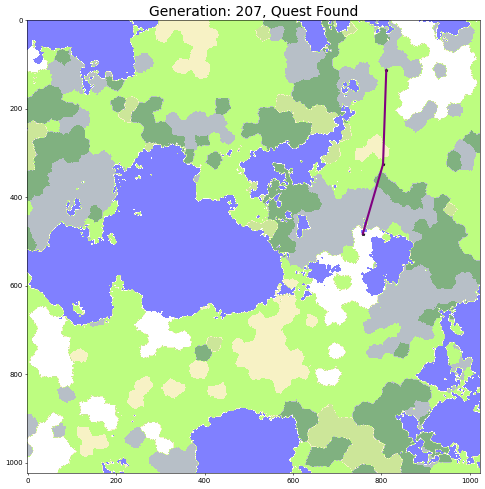

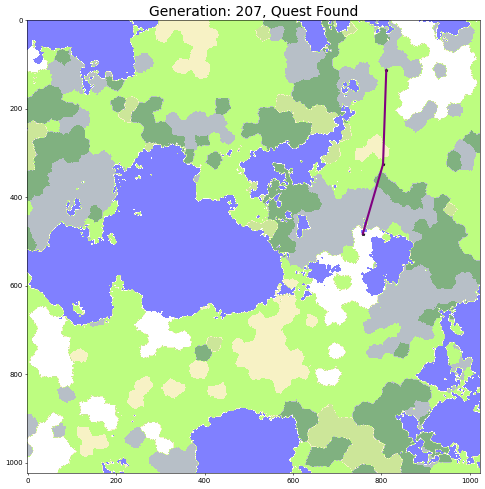

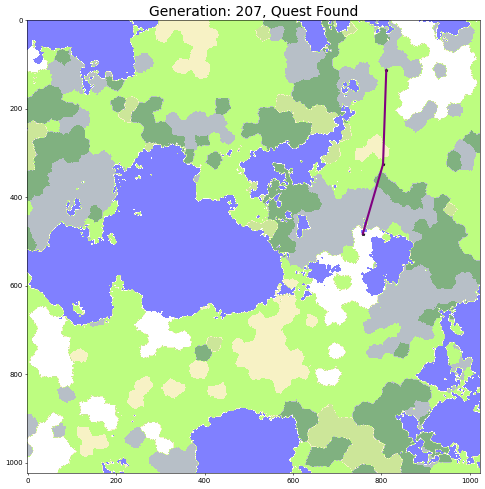

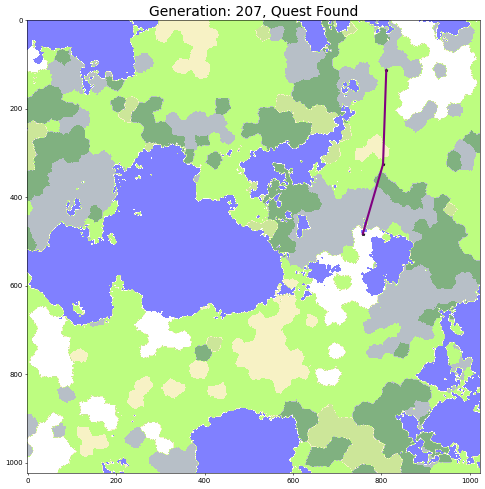

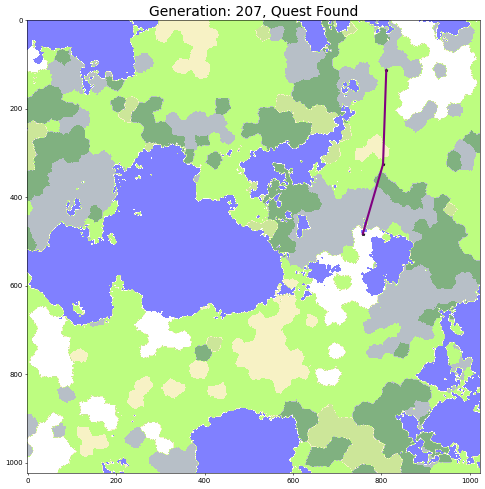

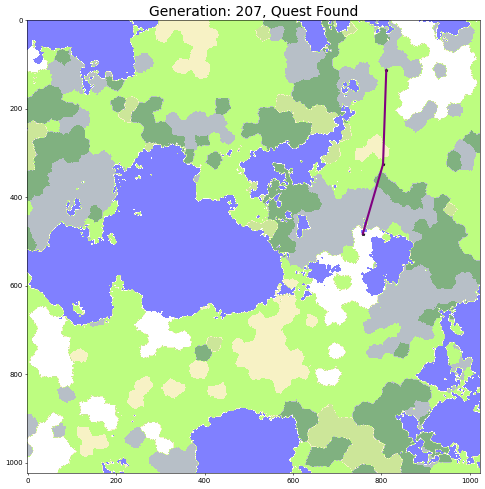

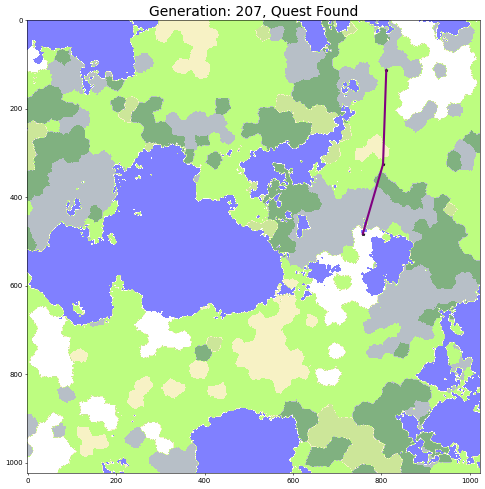

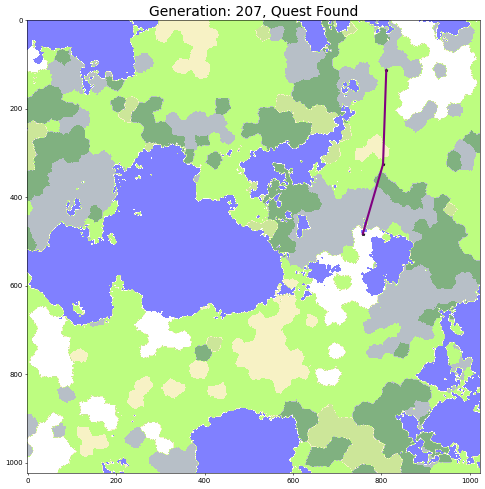

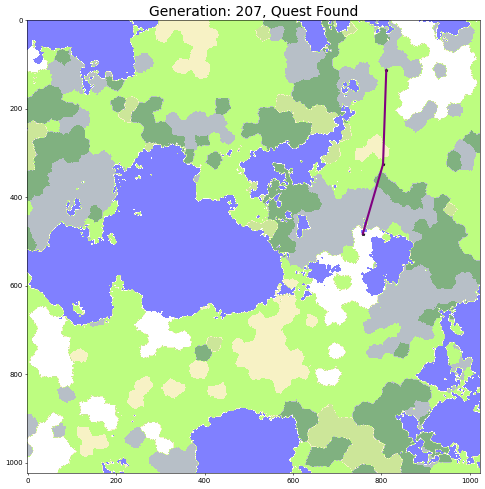

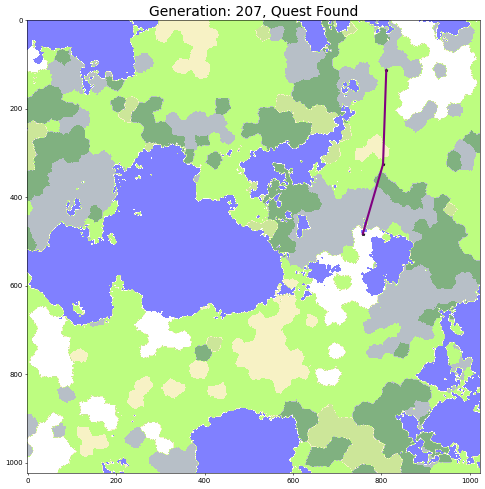

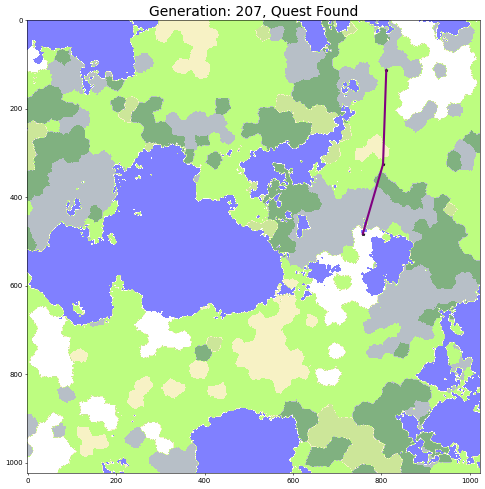

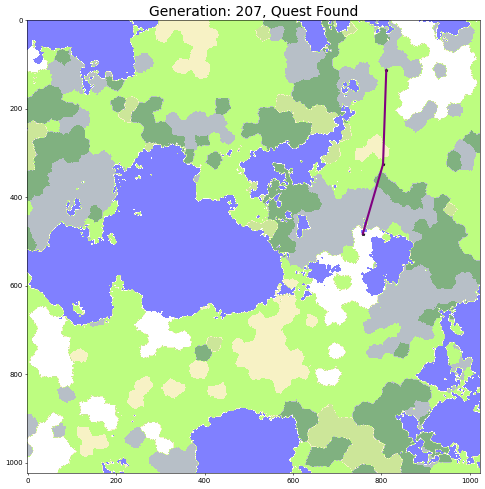

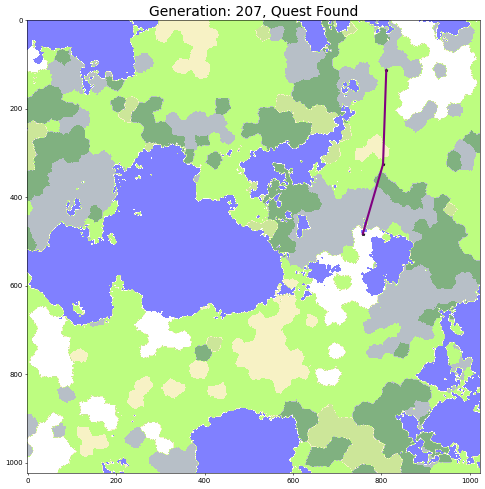

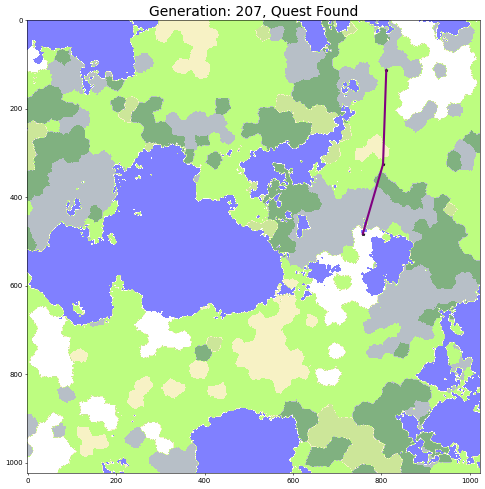

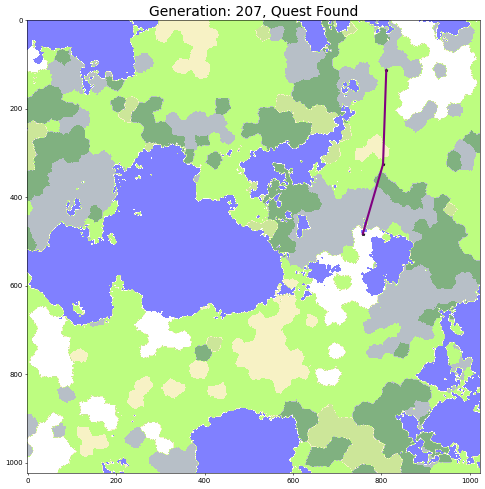

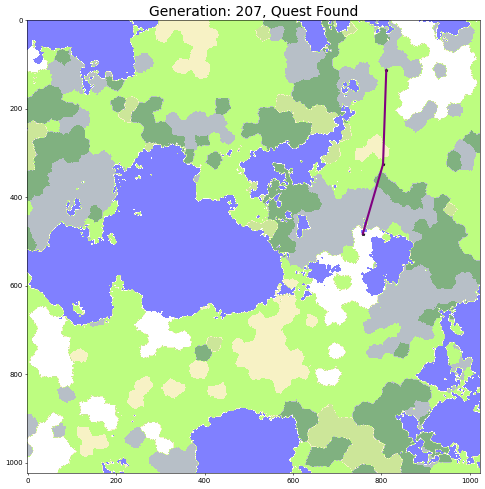

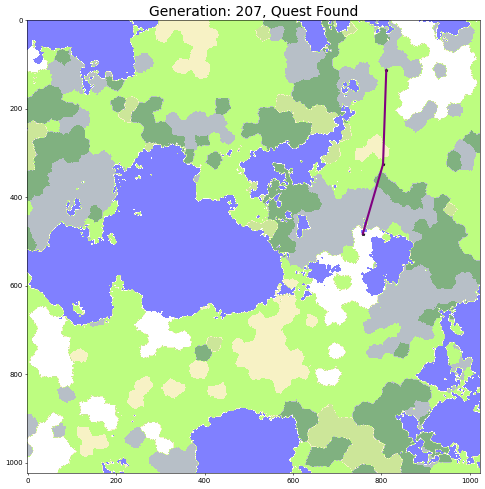

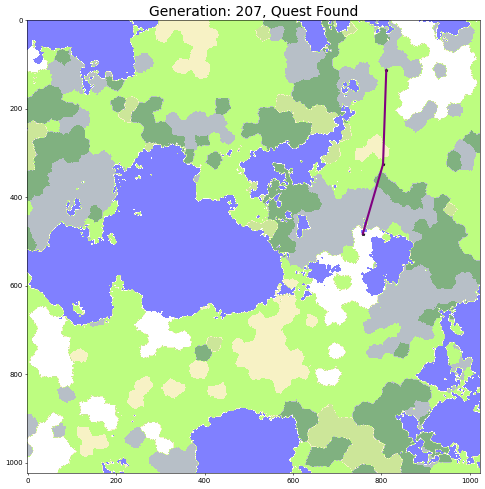

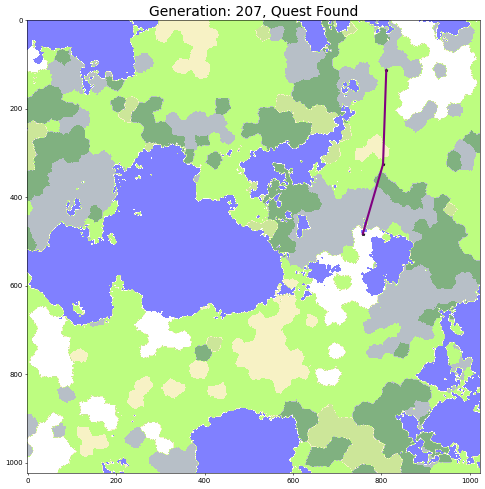

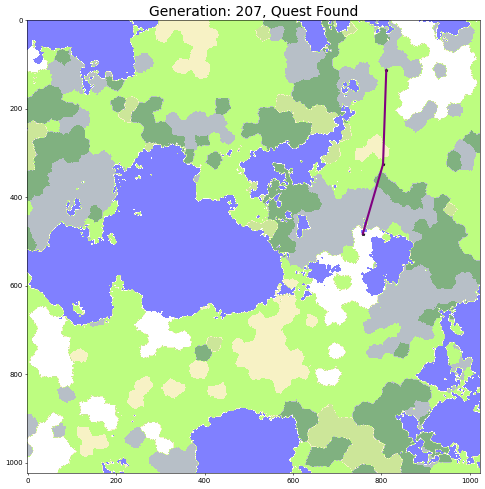

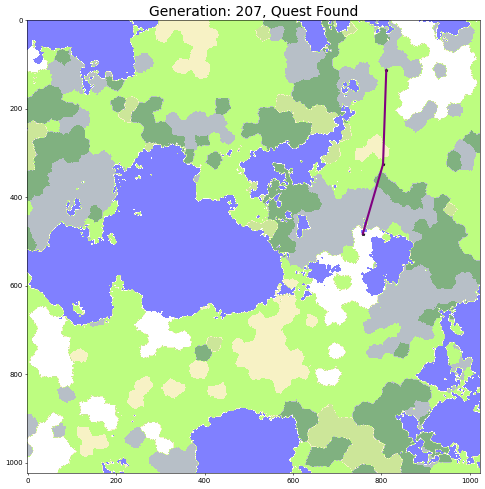

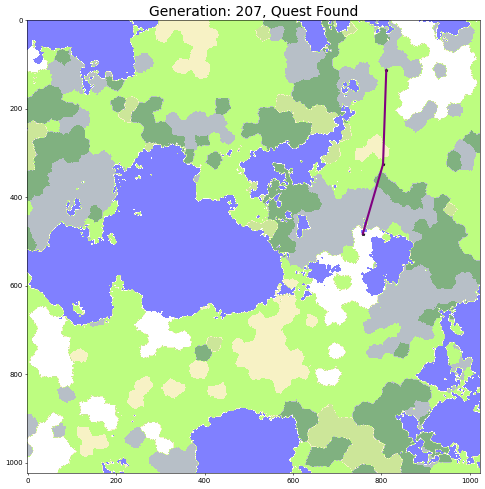

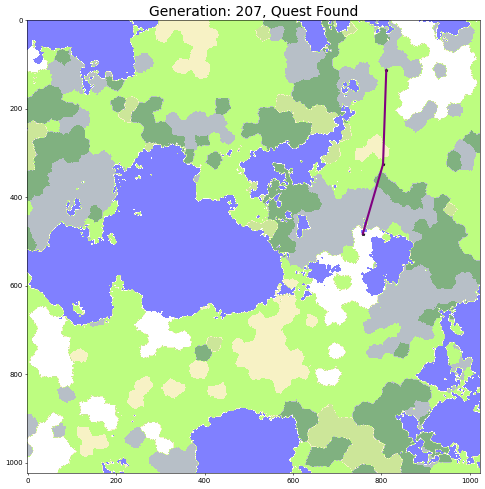

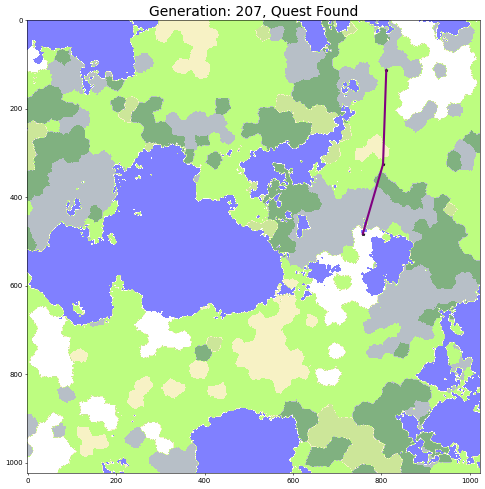

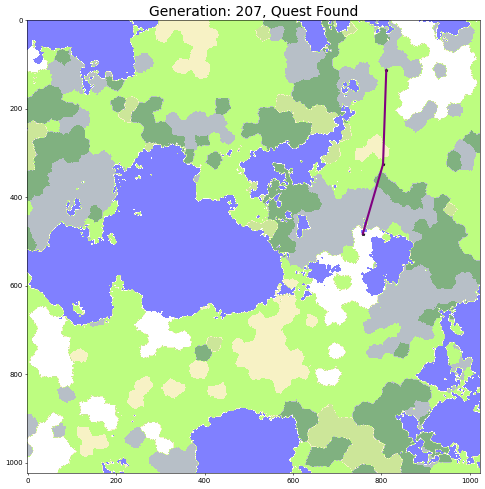

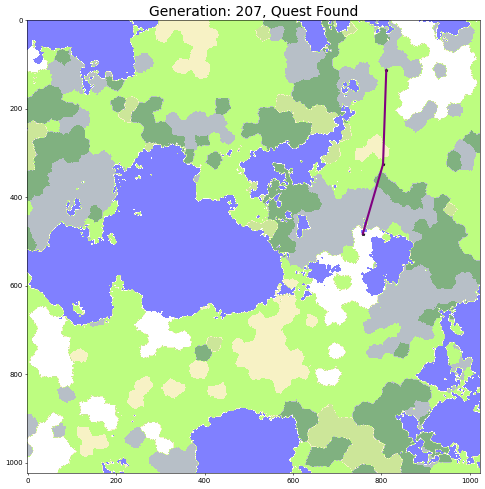

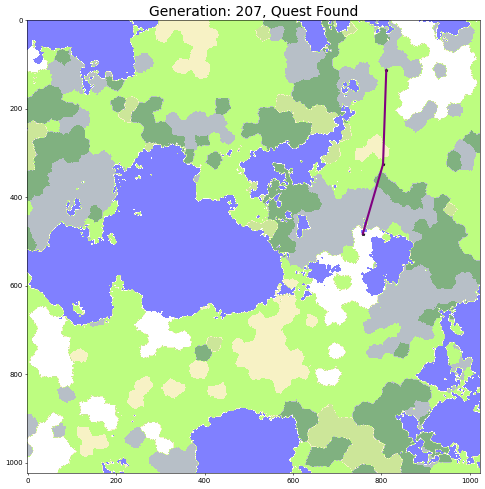

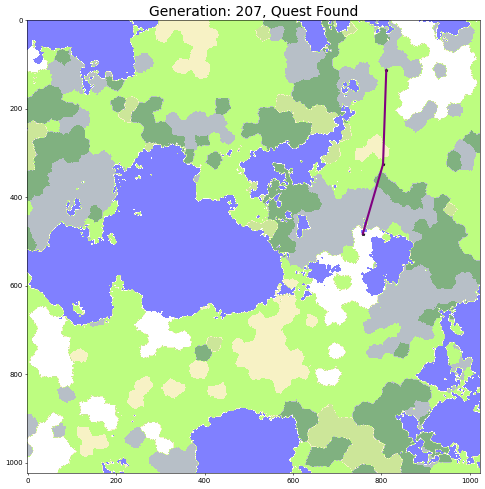

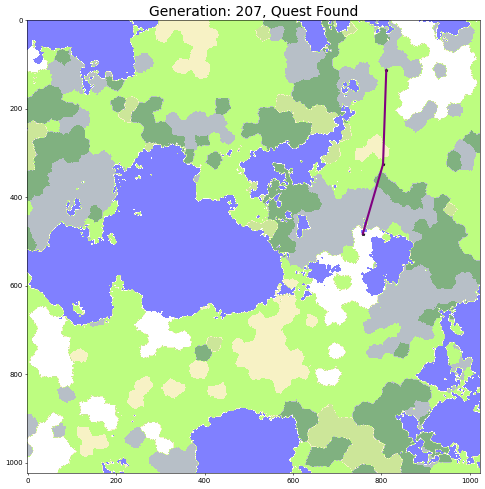

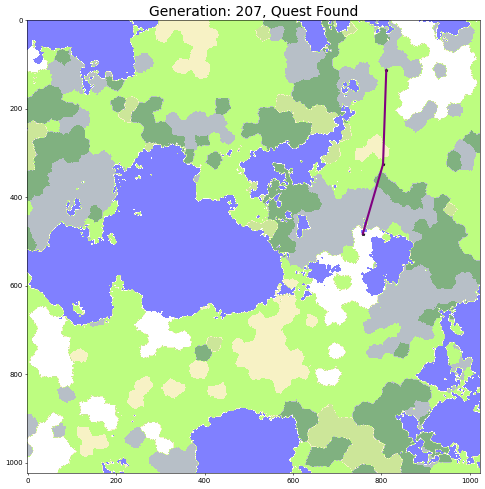

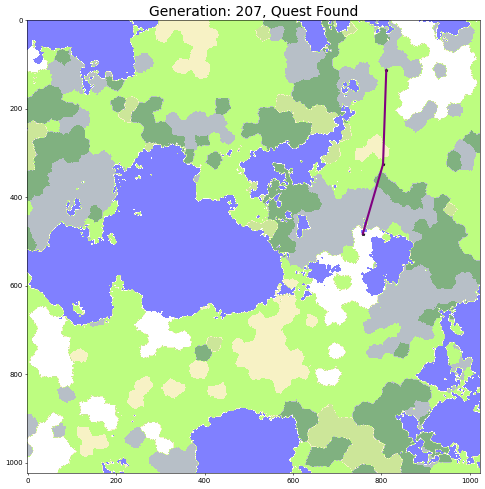

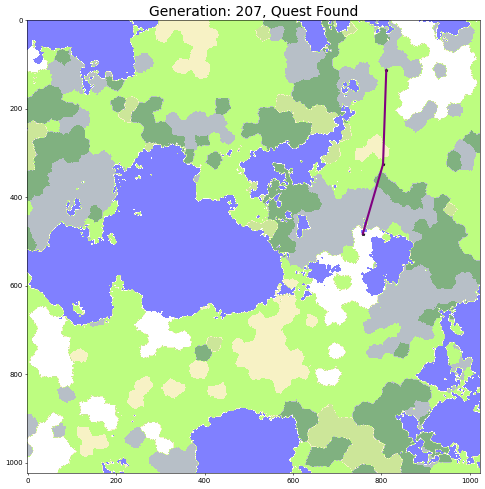

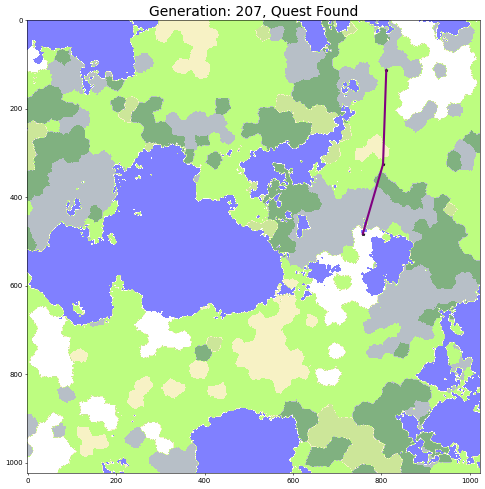

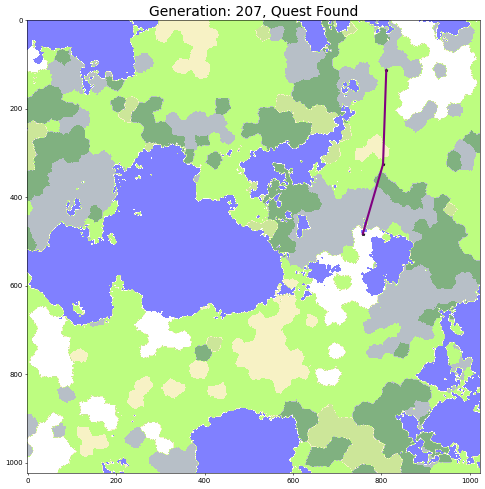

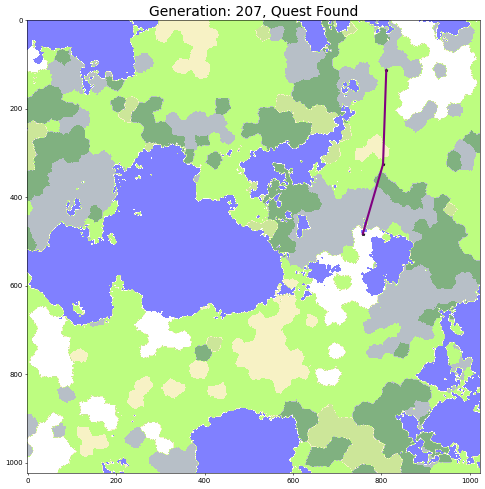

In [12]:
for j in range(40):

    fig, ax = plt.subplots()
    fig.set_dpi(50)
    fig.set_size_inches(12, 12)
    ax.imshow(nw.views["terrain"].T, cmap=cmap, alpha=.40)

    q = ind.path
    
    ax.scatter([i[0] for i in q], [i[1] for i in q], color="black",marker="*", s=30)
    ax.plot([i[0] for i in q], [i[1] for i in q], color="purple",linewidth=3)
    ax.set_title("Generation: {}, Quest Found".format(i), size=20)
    fig.savefig(f"fancy/{207+j}.png")

In [ ]:
print(ind.path_threat)

ind.check_threat()

In [ ]:

muts = ["complete","single_point","random_point"]
xos = ["pmx","single_point","ar"]
mups =  [.5]

for param in [p for p in itertools.product(*[muts,xos,mups])]:

            params = {
                "map"           :   nw,
                "mutation"      :   param[0],
                "xo"            :   param[1],
                "mu_p"          :   param[2],
                "gens"          :   500,
                "shelf_size"    :   50,
                "pop_size"      :   100,
                "print_it"      :   False,
                "brute_force"   :   False,
                "log"           :   True,
                "early_stop"    :   True,
            }

            ql = quest_library(params)

In [ ]:
params = {
                "map"           :   nw,
                "mutation"      :   "random_point",
                "xo"            :   "pmx",
                "mu_p"          :   .5,
                "gens"          :   500,
                "shelf_size"    :   1,
                "pop_size"      :   100,
                "print_it"      :   True,
                "brute_force"   :   False,
                "log"           :   False,
                "early_stop"    :   False,
            }

a = quest_library(params)

In [ ]:
nw.printer(quest_line = ql_1)

In [ ]:

path = "logs/"
files = os.listdir(path)
files = [f for f in files if f.endswith(".csv")]

df = pd.concat([pd.read_csv(path+f) for f in files])


for f in files:
    os.remove(path+f)
    
df.to_csv("logs/merged.csv", index=False)




In [ ]:
i = 1
fig, ax = plt.subplots()
fig.set_dpi(150)
fig.set_size_inches(15, 15)

cmap = colors.ListedColormap(
    ["blue", "white", "yellowgreen", "khaki", "lawngreen", "slategrey", "darkgreen"])

ax.imshow(nw.views["terrain"].T, cmap=cmap, alpha=.50)




for gen in pop.fancy:
    for q in gen:
        ax.scatter([i[0] for i in q], [i[1] for i in q], color="black",marker="*", s=15)
        ax.plot([i[0] for i in q], [i[1] for i in q], color="red",linestyle="dotted",linewidth=1)
        ax.set_title("Generation: " + str(i))
        fig.savefig(f"fancy/{i}.png")


In [ ]:
files

In [14]:
import imageio
images = []
#files = []
#for filename in os.listdir("/Users/cetiners/Desktop/Thesis/human_error/fancy"):
#    if ".png" in filename:
#        files.append(filename[:-4])
#
#files = files.sort(key=float)

files = [f"{i}.png" for i in range(1,246)]

for filename in files:
        
    images.append(imageio.imread("fancy/"+filename))
imageio.mimsave('/Users/cetiners/Desktop/Thesis/human_error/fancy/ohhhhyeaaah.gif', images)


In [ ]:
dc = {"a" : 2, "b" : 2}

In [ ]:
nw.meta.keys()

In [ ]:

fig, ax = plt.subplots()
fig.set_dpi(150)
fig.set_size_inches(15, 15)
for a in ['unblurred', 'final']:
    ax.imshow(nw.meta[a].T, alpha=.66)
ax.set_title(a)
#ax.scatter(x, y, c="black", s=15)
#ax.scatter(x_1, y_1, c="red", s=15)